In [1]:
# First, let's load the provided dataset to understand its structure and prepare it for ANOVA analysis.
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols



# Load the dataset
data_path = 'crop.data.csv'

# Specify the data types for each column
data_types = {
    'density': 'category',
    'block': 'category',
    'fertilizer': 'category',
    'yield': float  # Adjust the name if it was renamed to avoid Python keyword conflicts
}

# Load the dataset with the specified data types
crop_data = pd.read_csv(data_path, dtype=data_types)


# Display the first few rows of the dataset to understand its structure
crop_data.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [2]:
crop_data.describe()

,yield
count,96.000000
mean,177.015476
std,0.664548
min,175.360840
25%,176.468696
50%,177.058105
75%,177.398571
max,179.060899


In [3]:
crop_data.dtypes

density       category
block         category
fertilizer    category
yield          float64
dtype: object

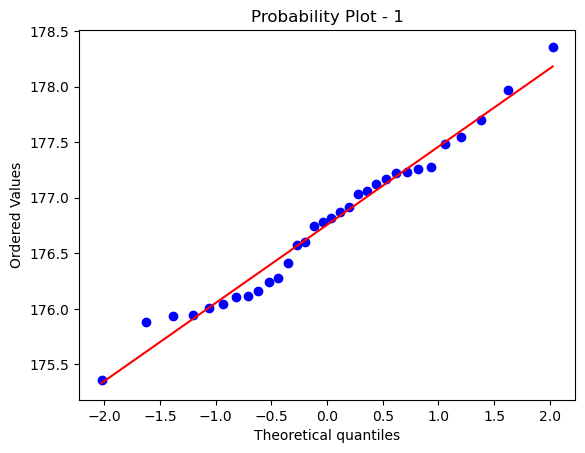

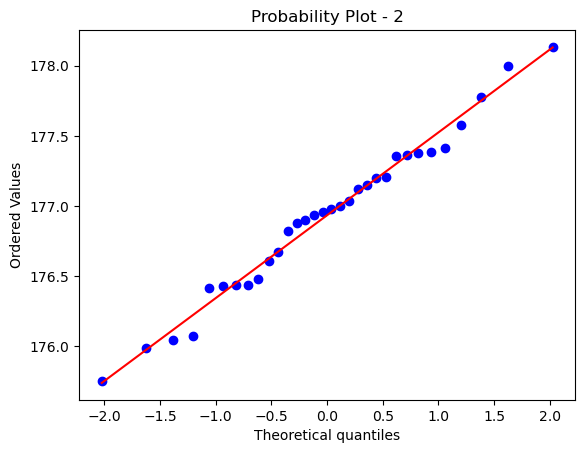

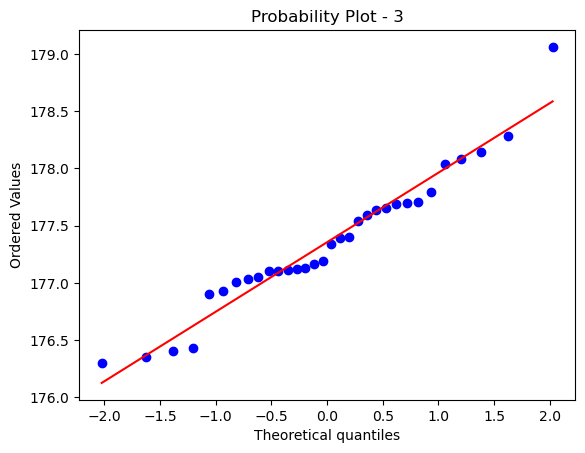

In [4]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_fertelizer = crop_data['fertilizer'].unique()
for major in unique_fertelizer:
    stats.probplot(crop_data[crop_data['fertilizer'] == major]['yield'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

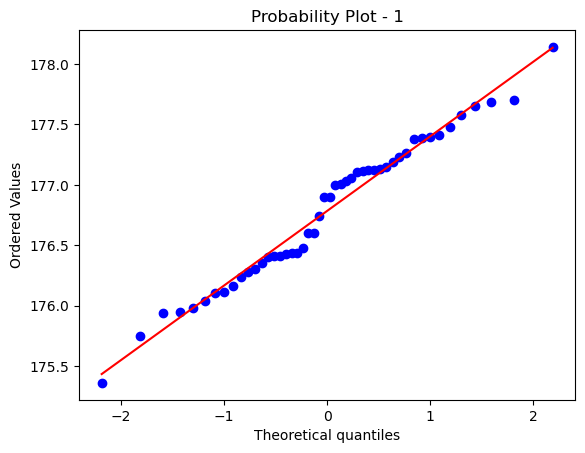

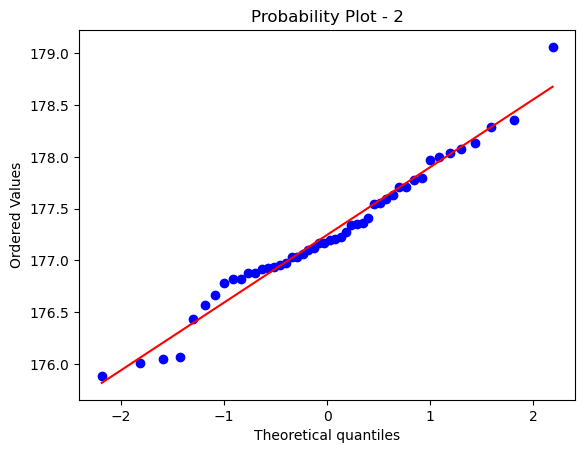

In [5]:
unique_density  = crop_data['density'].unique()
for major in unique_density :
    stats.probplot(crop_data[crop_data['density'] == major]['yield'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [6]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = crop_data.groupby('density').std().max() / crop_data.groupby('density').std().min()
ratio

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_24433/2195961611.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratio = crop_data.groupby('density').std().max() / crop_data.groupby('density').std().min()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_24433/2195961611.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratio = crop_data.groupby('density').std().max() / crop_data.groupby('density').std().min()


yield    1.060759
dtype: float64

# One way ANOVA

In [7]:
# Rename the 'yield' column to 'crop_yield' to avoid conflicts with Python keywords
crop_data.rename(columns={'yield': 'crop_yield'}, inplace=True)

# Adjust the model formula to use the new column name
model_formula_corrected = 'crop_yield ~ C(density) + C(fertilizer) + C(density):C(fertilizer)'

# Fit the model with the corrected formula
model_corrected = ols(model_formula_corrected, data=crop_data).fit()

# Perform ANOVA with the corrected model
anova_results_corrected = sm.stats.anova_lm(model_corrected, typ=2)

anova_results_corrected


,sum_sq,df,F,PR(>F)
C(density),5.121681,1.0,15.194517,0.000186
C(fertilizer),6.068047,2.0,9.001052,0.000273
C(density):C(fertilizer),0.427818,2.0,0.634605,0.532500
Residual,30.336687,90.0,NaN,NaN


# Two Way ANOVA

In [8]:
model_formula_corrected = 'crop_yield ~ C(density) + C(fertilizer) + C(density):C(fertilizer)'
model_corrected = ols(model_formula_corrected, data=crop_data).fit()

anova_results_corrected = sm.stats.anova_lm(model_corrected, typ=2)

anova_results_corrected

,sum_sq,df,F,PR(>F)
C(density),5.121681,1.0,15.194517,0.000186
C(fertilizer),6.068047,2.0,9.001052,0.000273
C(density):C(fertilizer),0.427818,2.0,0.634605,0.532500
Residual,30.336687,90.0,NaN,NaN


In [9]:
# Adjust the model formula to include "block" as a categorical variable
model_formula_with_block = 'crop_yield ~ C(density) + C(fertilizer) + C(block) + C(density):C(fertilizer)'

# Fit the model with the adjusted formula
model_with_block = ols(model_formula_with_block, data=crop_data).fit()

# Perform ANOVA with the adjusted model to see the effect of including "block"
anova_results_with_block = sm.stats.anova_lm(model_with_block, typ=2)

anova_results_with_block

,sum_sq,df,F,PR(>F)
C(density),2.434446,1.0,7.176795,0.008813
C(fertilizer),6.068047,2.0,8.944360,0.000291
C(block),3.710857,3.0,3.646560,0.015676
C(density):C(fertilizer),0.427818,2.0,0.630608,0.534656
Residual,29.850548,88.0,NaN,NaN


In [10]:
# To find the best-fit model for the given dataset, we will compare several models using AIC (Akaike Information Criterion) as a measure.
# Lower AIC values indicate a better fit. We will consider models with different combinations of independent variables.

# Model 1: Including only density and fertilizer
model_1_formula = 'crop_yield ~ C(density) + C(fertilizer)'
model_1 = ols(model_1_formula, data=crop_data).fit()

# Model 2: Including density, fertilizer, and their interaction
model_2_formula = 'crop_yield ~ C(density) + C(fertilizer) + C(density):C(fertilizer)'
model_2 = ols(model_2_formula, data=crop_data).fit()

# Model 3: Including density, fertilizer, block
model_3_formula = 'crop_yield ~ C(density) + C(fertilizer) + C(block)'
model_3 = ols(model_3_formula, data=crop_data).fit()

# Model 4: Including density, fertilizer, block, and interactions
model_4_formula = 'crop_yield ~ C(density) + C(fertilizer) + C(block) + C(density):C(fertilizer)'
model_4 = ols(model_4_formula, data=crop_data).fit()

# Comparing AIC values to find the best-fit model
aic_values = {
    'Model 1 (Density + Fertilizer)': model_1.aic,
    'Model 2 (Density + Fertilizer + Interaction)': model_2.aic,
    'Model 3 (Density + Fertilizer + Block)': model_3.aic,
    'Model 4 (Full model with interactions)': model_4.aic
}

aic_values

{'Model 1 (Density + Fertilizer)': 171.18948434252115,
 'Model 2 (Density + Fertilizer + Interaction)': 173.84511696164458,
 'Model 3 (Density + Fertilizer + Block)': 173.66038446281004,
 'Model 4 (Full model with interactions)': 176.29427808310095}

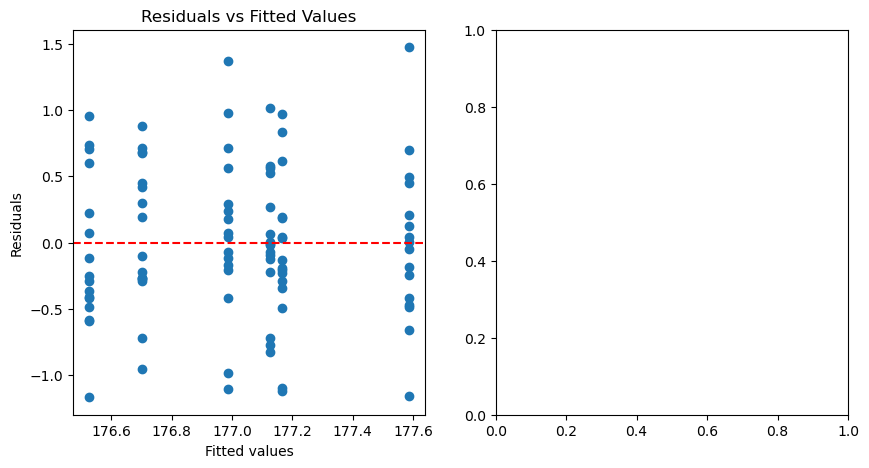

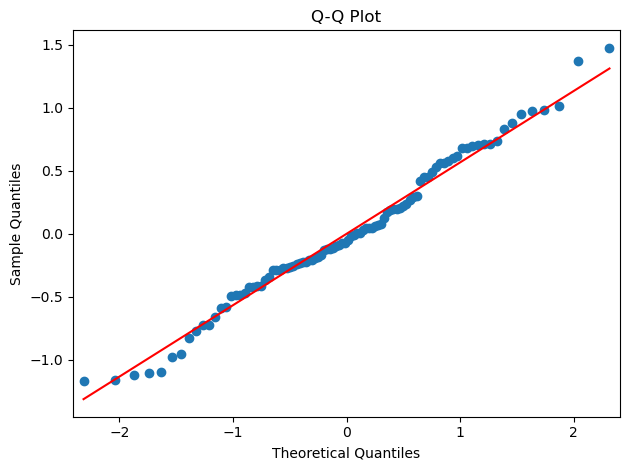

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming model_1 is your fitted OLS model from statsmodels
# Generate Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Generate Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(model_1.resid, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

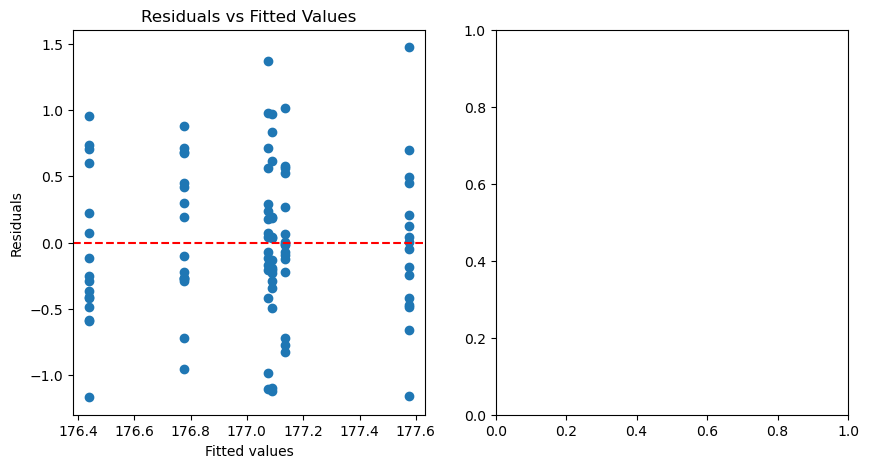

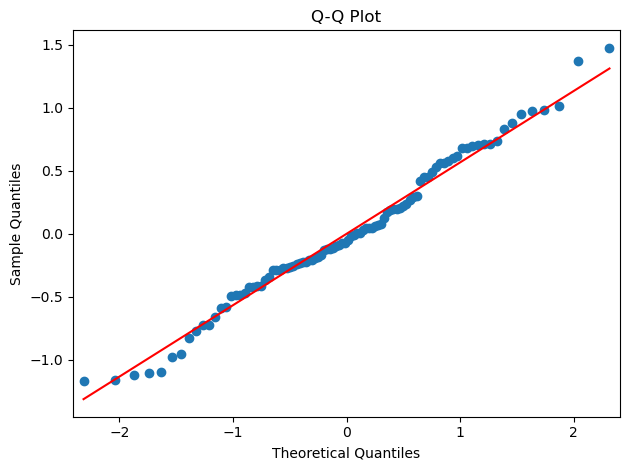

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming model_1 is your fitted OLS model from statsmodels
# Generate Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(model_2.fittedvalues, model_1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Generate Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(model_1.resid, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

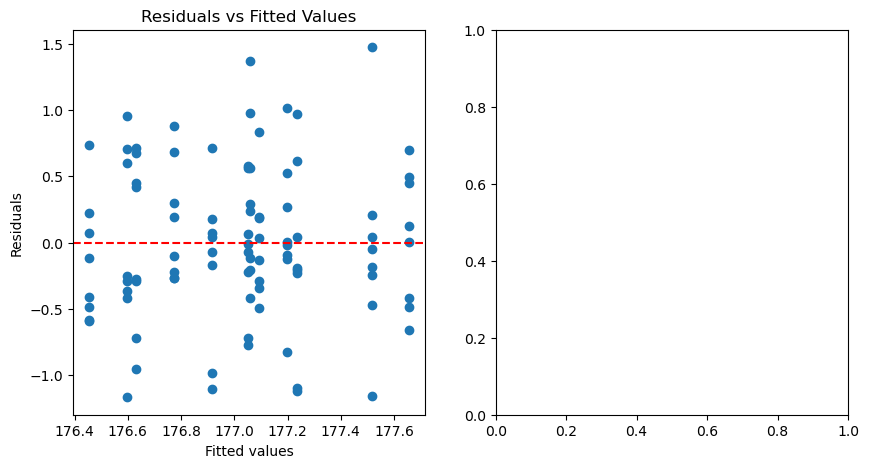

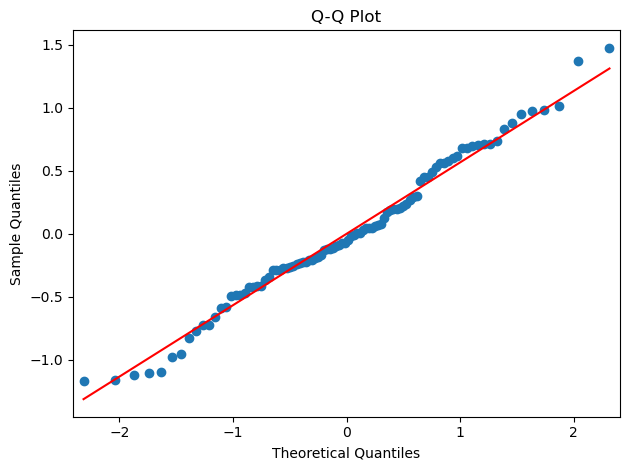

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming model_1 is your fitted OLS model from statsmodels
# Generate Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(model_3.fittedvalues, model_1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Generate Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(model_1.resid, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

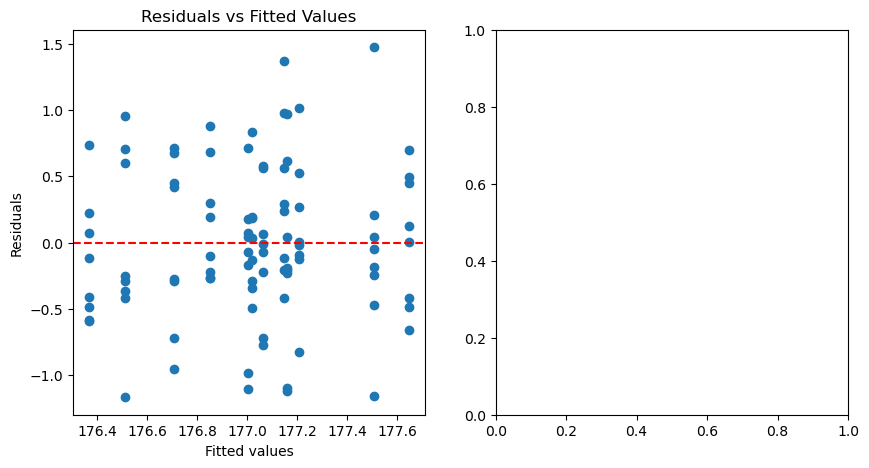

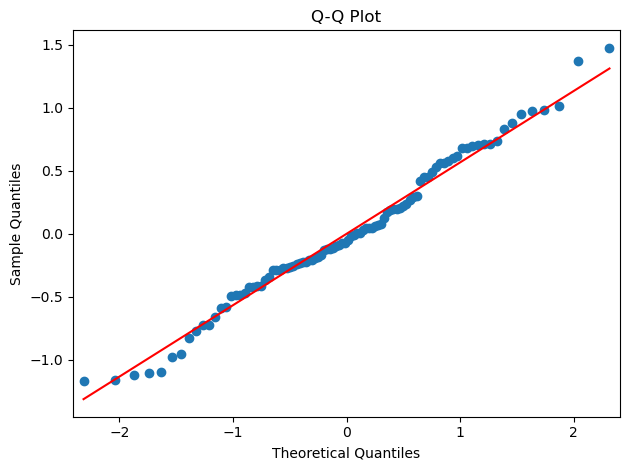

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming model_1 is your fitted OLS model from statsmodels
# Generate Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(model_4.fittedvalues, model_1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Generate Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(model_1.resid, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'crop_yield' is your dependent variable and 'fertilizer' is the factor you're interested in
tukey_result = pairwise_tukeyhsd(endog=crop_data['crop_yield'], groups=crop_data['fertilizer'], alpha=0.05)


print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1762 0.4955 -0.1937 0.5461  False
     1      3   0.5991 0.0006  0.2292  0.969   True
     2      3    0.423 0.0209  0.0531 0.7928   True
---------------------------------------------------


In [16]:
# Assuming 'crop_yield' is your dependent variable and 'fertilizer' is the factor you're interested in
tukey_result = pairwise_tukeyhsd(endog=crop_data['crop_yield'], groups=crop_data['density'], alpha=0.05)


print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2    0.462 0.0005 0.2083 0.7157   True
--------------------------------------------------


In [17]:
# Assuming 'crop_yield' is your dependent variable and 'fertilizer' is the factor you're interested in
tukey_result = pairwise_tukeyhsd(endog=crop_data['crop_yield'], groups=crop_data['block'], alpha=0.05)


print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.4605 0.0607 -0.0143  0.9353  False
     1      3  -0.1438 0.8577 -0.6185   0.331  False
     1      4   0.3196 0.2984 -0.1551  0.7944  False
     2      3  -0.6043 0.0067  -1.079 -0.1295   True
     2      4  -0.1409  0.865 -0.6156  0.3339  False
     3      4   0.4634 0.0584 -0.0114  0.9382  False
----------------------------------------------------


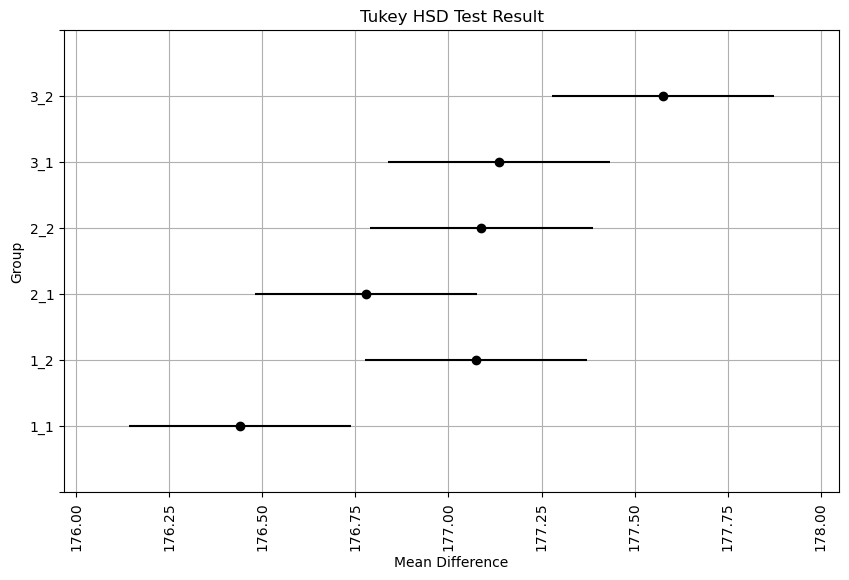

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Assuming 'crop_data' is your DataFrame and it's already loaded
# Update the model formula to include interaction between 'fertilizer' and 'density'
model_formula = 'crop_yield ~ C(fertilizer):C(density)'
model = ols(model_formula, data=crop_data).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Assuming the interaction is significant, perform Tukey's HSD for post-hoc comparison
# Note: Tukey's HSD in Python requires a flat input for groups, unlike R which can work directly with the ANOVA model.
# We'll simulate a combined group variable for interaction between 'fertilizer' and 'density'.

# Create a combined group variable for interaction
crop_data['fertilizer_density_interaction'] = crop_data['fertilizer'].astype(str) + "_" + crop_data['density'].astype(str)

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=crop_data['crop_yield'], groups=crop_data['fertilizer_density_interaction'], alpha=0.05)

# Plotting Tukey's HSD test result
tukey_result.plot_simultaneous(xlabel='Mean Difference', ylabel='Group')
plt.title('Tukey HSD Test Result')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
plt.grid(True)
plt.show()


In [20]:
# Calculate the mean yield for each combination of 'fertilizer' and 'density'
mean_yield_data = crop_data.groupby(['fertilizer', 'density'])['crop_yield'].mean().reset_index()

# Rename the resulting mean yield column to 'yield' for clarity
mean_yield_data.rename(columns={'crop_yield': 'mean_yield'}, inplace=True)

# Display the resulting DataFrame
print(mean_yield_data)

  fertilizer density  mean_yield
0          1       1  176.439598
1          1       2  177.074491
2          2       1  176.778288
3          2       2  177.088139
4          3       1  177.135608
5          3       2  177.576732


In [21]:
# Assigning group labels to the DataFrame
mean_yield_data['group'] = ["a", "b", "b", "b", "b", "c"]

# Display the updated DataFrame
print(mean_yield_data)

  fertilizer density  mean_yield group
0          1       1  176.439598     a
1          1       2  177.074491     b
2          2       1  176.778288     b
3          2       2  177.088139     b
4          3       1  177.135608     b
5          3       2  177.576732     c


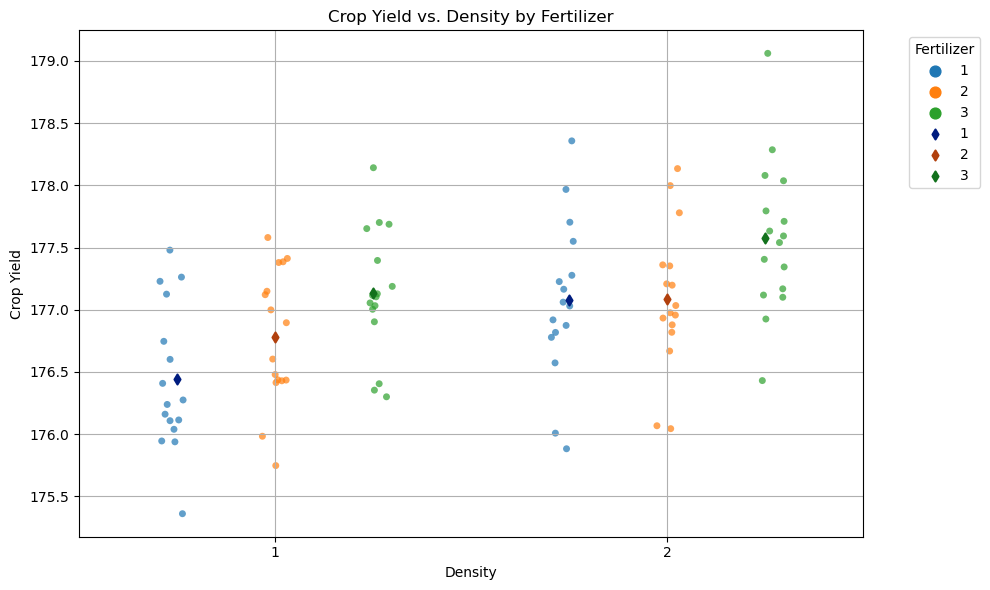

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'crop_data' is already loaded and includes 'density', 'yield', and 'fertilizer' columns
# Note: If 'yield' was renamed (e.g., to 'crop_yield'), please adjust the code accordingly

# Convert 'density' to a categorical type for effective jittering in stripplot
crop_data['density'] = crop_data['density'].astype('category')

plt.figure(figsize=(10, 6))
sns.stripplot(data=crop_data, x='density', y='crop_yield', hue='fertilizer', jitter=0.1, dodge=True, alpha=0.7, zorder=1)

# Adding point plot for mean values to add clarity
sns.pointplot(data=crop_data, x='density', y='crop_yield', hue='fertilizer', dodge=0.5, join=False, palette='dark', markers='d', scale=0.75, ci=None, zorder=2)

plt.title('Crop Yield vs. Density by Fertilizer')
plt.xlabel('Density')
plt.ylabel('Crop Yield')
plt.grid(True)

# Handling legend
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

TypeError: incompatible index of inserted column with frame index

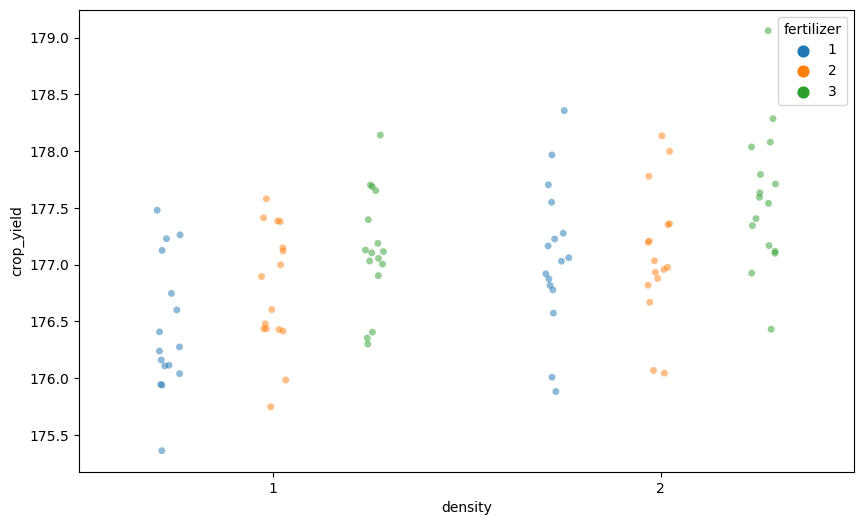

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'crop_data' and 'mean_yield_data' are already loaded
# Ensure 'mean_yield_data' has the 'group' column added as shown in previous steps

# Convert 'density' and 'fertilizer' to categorical types if not already
crop_data['density'] = crop_data['density'].astype('category')
crop_data['fertilizer'] = crop_data['fertilizer'].astype('category')

# Calculate mean and standard error for each combination of 'density' and 'fertilizer'
def calc_mean_se(group):
    mean = np.mean(group)
    se = np.std(group, ddof=1) / np.sqrt(len(group))
    return pd.Series({'mean': mean, 'se': se})



plt.figure(figsize=(10, 6))

# Plot using seaborn to handle the main points with jitter
sns.stripplot(data=crop_data, x='density', y='crop_yield', hue='fertilizer', jitter=0.1, dodge=True, alpha=0.5, zorder=1)

# Calculate mean and standard error for each group and density combination
# This step assumes 'mean.yield.data' is prepared with correct mean values per group
def mean_se(y_vals):
    return {'mean': np.mean(y_vals), 'se': np.std(y_vals) / np.sqrt(len(y_vals))}

# Group the data by density and fertilizer to calculate mean and SE
grouped = crop_data.groupby(['density', 'fertilizer'])['crop_yield'].apply(mean_se).reset_index(name='stats')
grouped[['mean', 'se']] = crop_data.groupby(['density', 'fertilizer'])['crop_yield'].apply(calc_mean_se).unstack()

# Plot error bars for each group
for _, row in grouped.iterrows():
    plt.errorbar(x=row['density'], y=row['mean'], yerr=row['se'], fmt='none', ecolor='black', elinewidth=1.5, capsize=5, zorder=2)

# Overlay mean yield points from 'mean_yield_data'
sns.scatterplot(data=mean_yield_data, x='density', y='crop_yield', hue='fertilizer', s=100, edgecolor='black', zorder=3)

plt.title('Yield vs. Density by Fertilizer with Error Bars')
plt.xlabel('Density')
plt.ylabel('Yield')
plt.grid(True)
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
grouped

,density,fertilizer,level_2,stats
0,1,1,mean,176.439598
1,1,1,se,0.141872
2,1,2,mean,176.778288
3,1,2,se,0.131052
4,1,3,mean,177.135608
5,1,3,se,0.123515
6,2,1,mean,177.074491
7,2,1,se,0.155188
8,2,2,mean,177.088139
9,2,2,se,0.140471


/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


KeyError: 'crop_yield'

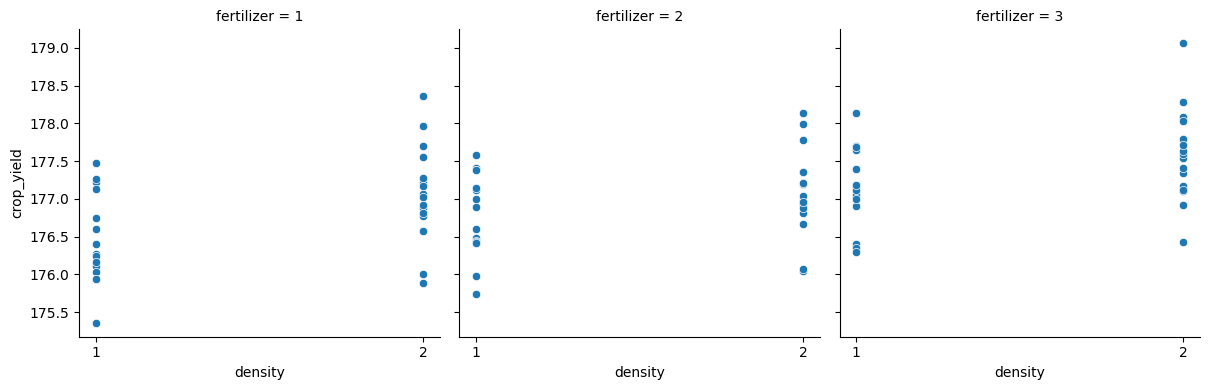

In [32]:

# First, create a scatter plot faceted by 'fertilizer' using seaborn's FacetGrid
g = sns.FacetGrid(crop_data, col='fertilizer', col_wrap=4, height=4)
g.map(sns.scatterplot, 'density', 'crop_yield')

# Iterate through each facet to add text annotations
for ax, (fertilizer, group_data) in zip(g.axes.flatten(), mean_yield_data.groupby('fertilizer')):
    for _, row in grouped.iterrows():
        # Adjust text position and size as needed
        ax.text(row['density'], row['crop_yield'], row['group'], verticalalignment='top', fontsize=10)

plt.show()